## 1. Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимый признак и зависимый признак (отклик). Оставьте в наборе признаки, принимающие числовые значения.

Download the needed libraries and packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
# loading cherry_blossoms dataset
ds = tfds.load("cherry_blossoms", split='train')
ds
# Convert tf.data.cherry_blossoms to a panda dataframe
df = tfds.as_dataframe(ds)
df.head()

,doy,temp,temp_lower,temp_upper,year
0,NaN,6.46,4.76,8.16,1300
1,105.0,5.63,4.90,6.37,1638
2,109.0,5.81,4.68,6.95,1347
3,104.0,5.70,4.87,6.53,1187
4,107.0,6.20,5.31,7.09,1617


In [3]:
print(df.info())

<class 'tensorflow_datasets.core.as_dataframe.as_dataframe.<locals>.StyledDataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   doy         827 non-null    float32
 1   temp        1124 non-null   float32
 2   temp_lower  1124 non-null   float32
 3   temp_upper  1124 non-null   float32
 4   year        1215 non-null   int32  
dtypes: float32(4), int32(1)
memory usage: 23.9 KB
None


In [4]:
#Let's see which columns have NaN values
# count NaN values in each column
print(df.isnull().sum())

doy           388
temp           91
temp_lower     91
temp_upper     91
year            0
dtype: int64


In [5]:
#Let's drop the doy column since it has a lot of NaN values
df = df.drop(columns=['doy'])

In [6]:
#Check first 5 rows and info
print(df.head())
print(df.info())

   temp  temp_lower  temp_upper  year
0  6.46        4.76        8.16  1300
1  5.63        4.90        6.37  1638
2  5.81        4.68        6.95  1347
3  5.70        4.87        6.53  1187
4  6.20        5.31        7.09  1617
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        1124 non-null   float32
 1   temp_lower  1124 non-null   float32
 2   temp_upper  1124 non-null   float32
 3   year        1215 non-null   int32  
dtypes: float32(3), int32(1)
memory usage: 19.1 KB
None


In [7]:
df[df.isnull().any(axis=1)]

,temp,temp_lower,temp_upper,year
38,NaN,NaN,NaN,856
42,NaN,NaN,NaN,829
78,NaN,NaN,NaN,807
93,NaN,NaN,NaN,834
107,NaN,NaN,NaN,817
...,...,...,...,...
1132,NaN,NaN,NaN,803
1136,NaN,NaN,NaN,1987
1173,NaN,NaN,NaN,858
1187,NaN,NaN,NaN,1981


In [8]:
#let's drop all rows with at least one nan value
df = df.dropna()

In [9]:
print(df.head())
print(df.info())

   temp  temp_lower  temp_upper  year
0  6.46        4.76        8.16  1300
1  5.63        4.90        6.37  1638
2  5.81        4.68        6.95  1347
3  5.70        4.87        6.53  1187
4  6.20        5.31        7.09  1617
<class 'pandas.core.frame.DataFrame'>
Index: 1124 entries, 0 to 1214
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        1124 non-null   float32
 1   temp_lower  1124 non-null   float32
 2   temp_upper  1124 non-null   float32
 3   year        1124 non-null   int32  
dtypes: float32(3), int32(1)
memory usage: 26.3 KB
None


## 2. Удалите из набора точки с выбросами при помощи стандартизованной оценки (Z-score) таким образом, чтобы точки с выбросами составляли от 5% до 10% всех точек набора данных. Визуализируйте точки исходного набора данных на плоскости в виде диаграммы рассеяния (ось X – независимый признак temp_lower, ось Y – зависимый признак year), показывая оставленные в наборе точки и удаленные точки разными цветами, подписывая оси и рисунок и создавая легенду.

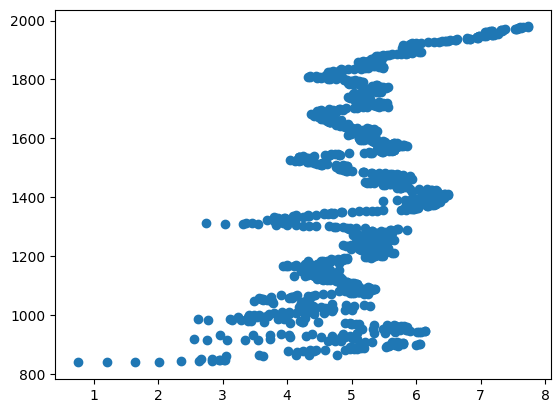

In [10]:
#let's see the scatter plot
plt.scatter(df['temp_lower'], df['year'])

In [59]:
#let's standardize independent feeature
df['temp_lower'] = (df['temp_lower'] - np.mean(df['temp_lower']))/np.std(df['temp_lower'])
df['temp'] = (df['temp'] - np.mean(df['temp']))/np.std(df['temp'])
df['temp_upper'] = (df['temp_upper'] - np.mean(df['temp_upper']))/np.std(df['temp_upper'])

print(np.mean(df['temp_lower']), np.std(df['temp_lower']))
print(np.mean(df['temp']), np.std(df['temp']))
print(np.mean(df['temp_upper']), np.std(df['temp_upper']))

-7.636182e-09 1.0
-1.01815765e-08 1.0
5.0907882e-09 1.0


In [60]:
#let's scale the dependent feature on the interval [-1,1]
df['year'] = (2 * (df['year'] - np.min(df['year'])) / (np.max(df['year']) - np.min(df['year']))) - 1

In [61]:
np.min(df['temp_lower']), np.max(df['temp_lower']), np.min(df['year']), np.max(df['year'])

(-5.116575, 3.1072328, -1.0, 1.0)

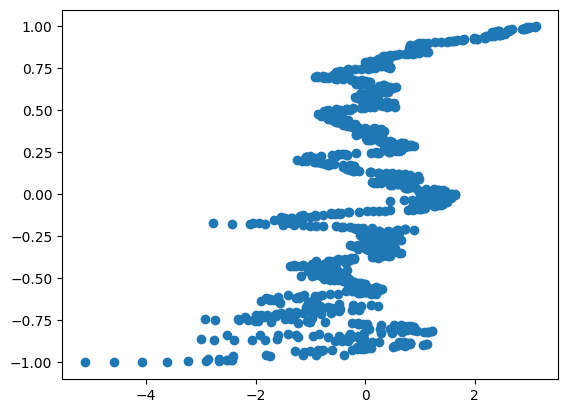

In [216]:
plt.scatter(df['temp_lower'], df['year'])

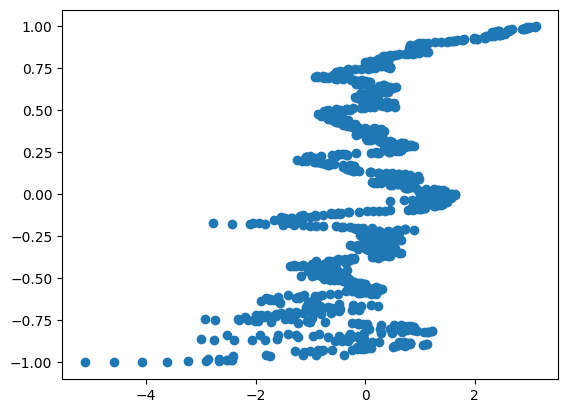

In [63]:
plt.scatter(df['temp_lower'], df['year'])

In [64]:
x_out = df
pd.DataFrame(x_out).to_numpy()

array([[ 0.47955483, -0.39876768,  0.98223627, -0.1919369 ],
       [-0.7716651 , -0.23405635, -0.82132876,  0.40052585],
       [-0.50031644, -0.49288896, -0.23693347, -0.10955302],
       ...,
       [ 0.81120318,  1.15422559,  0.08549175,  0.90359334],
       [ 0.01223177,  0.22478254, -0.17647836,  0.37598598],
       [ 1.39912629,  1.06010485,  0.96208525, -0.028922  ]])

In [65]:
x_out.shape

(1124, 4)

In [82]:
x_out.info

<bound method DataFrame.info of           temp  temp_lower  temp_upper      year
0     0.479555   -0.398768    0.982236 -0.191937
1    -0.771665   -0.234056   -0.821329  0.400526
2    -0.500316   -0.492889   -0.236933 -0.109553
3    -0.666141   -0.269352   -0.660116 -0.390009
4     0.087606    0.248313   -0.095872  0.363716
...        ...         ...         ...       ...
1210  0.464480    0.836568   -0.085797  0.293602
1211 -0.651066   -0.151701   -0.750798  0.404032
1212  0.811203    1.154226    0.085492  0.903593
1213  0.012232    0.224783   -0.176478  0.375986
1214  1.399126    1.060105    0.962085 -0.028922

[1124 rows x 4 columns]>

In [91]:
z_score = 2
print('Число точек до удаления выбросов = %d' % (x_out.shape[0]))
x2_out = x_out.loc[((x_out >= -z_score).sum(axis=1)==4) & ((x_out <= z_score).sum(axis=1)==4),:] # NB .loc
print('Число точек после удаления выбросов = %d' % (x2_out.shape[0]))

Число точек до удаления выбросов = 1124
Число точек после удаления выбросов = 1028


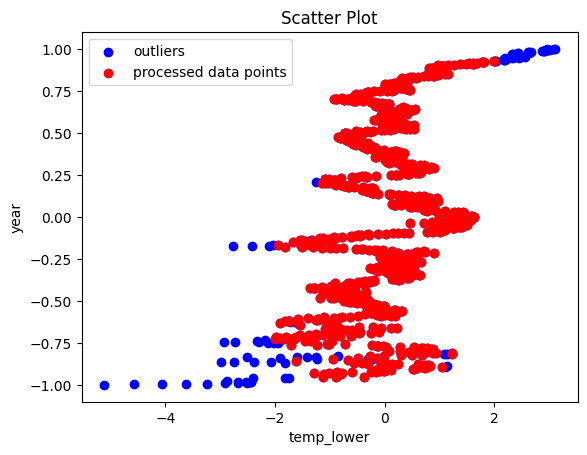

In [94]:
#About 8.5% of data pouint were removed
#Let's see the difference
plt.scatter(x_out['temp_lower'], x_out['year'], color='blue', label='outliers')
plt.scatter(x2_out['temp_lower'], x2_out['year'], color='red', label='processed data points')
plt.xlabel('temp_lower')  # Customize x-axis label
plt.ylabel('year')  # Customize y-axis label
plt.title('Scatter Plot')
plt.legend()
plt.legend(loc='upper left')

## 3. Выполните стандартизацию независимого признака и масштабирование на интервал [-1, 1] зависимого признака. Решите задачи линейной регрессии и полиномиальной регрессии для степени полинома, указанной в индивидуальном задании, при помощи нейронных сетей с одним нейроном и оцените качество полученных моделей по показателю, указанному в индивидуальном задании. Отследите обучение нейронных сетей, изменяя, при необходимости, гиперпараметры (функцию потерь, оптимизатор, шаг обучения и т.п.) или применяя регуляризацию. 4. Постройте кривые обучения для построенных нейронных сетей с зависимостью от количества эпох. На визуализации создайте легенду. 5. Визуализируйте точки набора данных на плоскости в виде диаграммы рассеяния (ось X – независимый признак, ось Y – зависимый признак), а также линии линейной и полиномиальной регрессий (другими цветами), подписывая оси и рисунок и создавая легенду.


In [95]:
#Let's define a class `RegressionSGD` that uses stochastic gradient descent
class RegressionSGD:

    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        self._theta = None

    def fit(self, X_train, y_train, n_iters=50, t0=5, t1=50):
        assert X_train.shape[0] == y_train.shape[0], \
            "Размер X_train должен быть равен размеру y_train"
        assert n_iters >= 1

        def dJ_sgd(theta, X_b_i, y_i):
            return X_b_i * (X_b_i.dot(theta) - y_i) * 2.

        def sgd(X_b, y, initial_theta, n_iters=5, t0=5, t1=50):

            def learning_rate(t):
                return t0 / (t + t1)

            theta = initial_theta
            m = len(X_b)
            for i_iter in range(n_iters):
                indexes = np.random.permutation(m)
                X_b_new = X_b[indexes,:]
                y_new = y[indexes]
                for i in range(m):
                    gradient = dJ_sgd(theta, X_b_new[i], y_new[i])
                    theta = theta - learning_rate(i_iter * m + i) * gradient

            return theta

        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        initial_theta = np.random.randn(X_b.shape[1])
        self._theta = sgd(X_b, y_train, initial_theta, n_iters, t0, t1)

        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]

        return self

    def predict(self, X_predict):
        assert self.intercept_ is not None and self.coef_ is not None, \
            "Нужно обучить модель перед использованием!"
        assert X_predict.shape[1] == len(self.coef_), \
            "Кол-во признаков в X_predict должно быть равно кол-ву признаков в X_train"

        X_b = np.hstack([np.ones((len(X_predict), 1)), X_predict])
        return X_b.dot(self._theta)

    def score(self, X_test, y_test):
        y_predict = self.predict(X_test)
        return r2_score(y_test, y_predict)

    def __repr__(self):
        return "RegressionSGD()"

In [98]:
X = x2_out['temp_lower'].values.reshape(-1,1)           # преобразуем вектор в матрицу с одним столбцом
y = x2_out['year']

In [105]:
X = pd.DataFrame(X).to_numpy()

In [109]:
y.info

<bound method Series.info of 0      -0.191937
1       0.400526
2      -0.109553
3      -0.390009
4       0.363716
          ...   
1210    0.293602
1211    0.404032
1212    0.903593
1213    0.375986
1214   -0.028922
Name: year, Length: 1028, dtype: float64>

In [110]:
y = pd.Series(y).to_numpy()

In [112]:
y.shape

(1028,)

In [107]:
X.shape

(1028, 1)

In [113]:
reg = RegressionSGD()
reg.fit(X, y, n_iters=2)
reg.coef_, reg.intercept_

(array([0.21296096]), 0.04600320439506115)

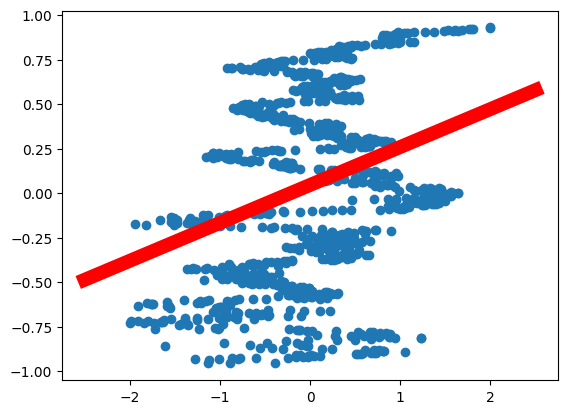

In [116]:
plt.scatter(x2_out['temp_lower'], x2_out['year'])
plot_x = np.linspace(-2.5, 2.5, 101)
plt.plot(plot_x, reg.predict(plot_x.reshape(-1,1)), c='r', lw=10);

$R^2$ score for linear model 

In [186]:
#We can that the model only explains 9% of the variance which is very low
r2 = r2_score(y, reg.predict(X))
print(r2)

0.09201340260472668


In [150]:
#Полиномиальная регрессия
#Let's prepare input data for the regression model with two characteristics - linear and 4th power dependence on the independent variable:
X4 = np.hstack([X, X**2, X**3, X**4]) # соединение массивов по горизонтали
X4.shape

(1028, 4)

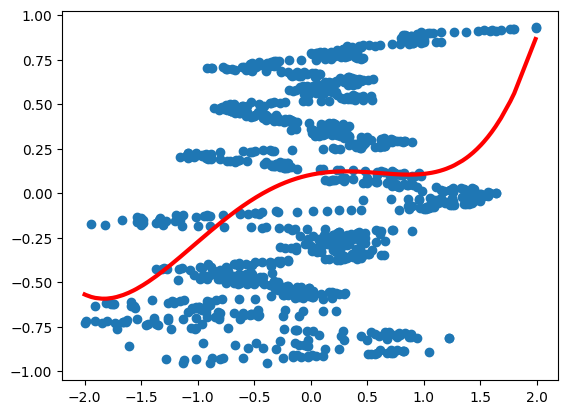

In [152]:
reg2 = RegressionSGD()
reg2.fit(X4, y, n_iters=2000)
y_predict2 = reg2.predict(X4)

plt.scatter(x2_out['temp_lower'], y)
plt.plot(np.sort(x2_out['temp_lower']), y_predict2[np.argsort(x2_out['temp_lower'])], c='r', lw=3);

In [153]:
reg2.coef_, reg2.intercept_

(array([ 0.133859  , -0.25286321,  0.05737394,  0.06668921]),
 0.10283383497566828)

In [162]:
#Let's create a simple neural network with one layer of one neuron and two input neurons:
reg2_model = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)), #Polynomial degree
    tf.keras.layers.Dense(units=1)
])

In [163]:
reg2_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

In [164]:
from sklearn.metrics import r2_score

In [187]:
# Custom metric function for R2 score
def r2_metric(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    return r2

In [196]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [198]:
reg2_model.compile(
    optimizer=tf.optimizers.AdamW(learning_rate=0.01),
    loss='mean_absolute_error')

In [199]:
history = reg2_model.fit(
    X4, y,
    epochs=100,
    # уровень выводимой информации
    verbose=1,
    # проверка (валидация) на 30% обучающих данных
    validation_split = 0.3)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4450 - val_loss: 0.4067
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4275 - val_loss: 0.4038
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4405 - val_loss: 0.4028
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4467 - val_loss: 0.4019
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4303 - val_loss: 0.4028
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4395 - val_loss: 0.3999
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4245 - val_loss: 0.4042
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4273 - val_loss: 0.4026
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4328 - val_loss: 0.4002
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4393 - val_loss: 0.4011
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4204 - val_loss: 0.4028
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4

In [200]:
#The fit method returns a history object, which typically has the 'loss' and 'val_loss' keys for the regression task. 
#You can visualize your learning history using the following function:

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    #plt.ylim([0, max(history.history['loss']*0.5)])
    plt.title('Функция потерь при обучении модели')
    plt.xlabel('Эпохи обучения')
    plt.ylabel('Функция потерь')
    plt.legend(['Обучающая выборка', 'Тестовая выборка'], loc='upper right')
    plt.grid(True)

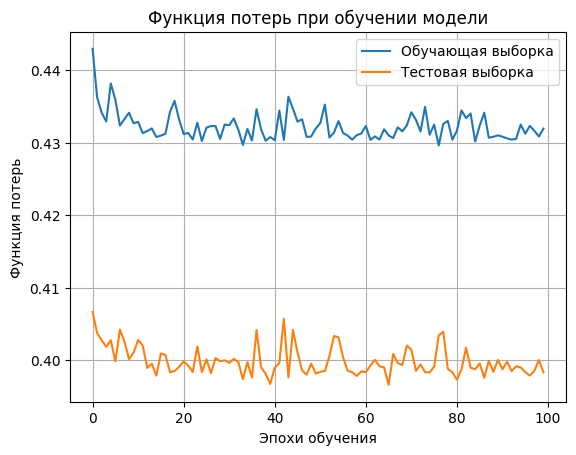

In [201]:
plot_loss(history)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step


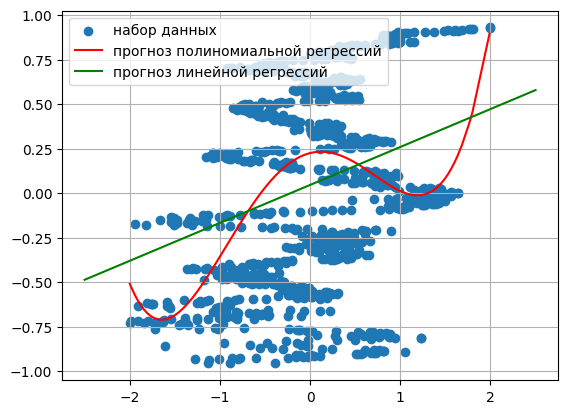

In [209]:
y_predict_reg2 = reg2_model.predict(X4)

plt.scatter(x2_out['temp_lower'], x2_out['year'], label='набор данных')
plt.plot(np.sort(x2_out['temp_lower']), y_predict_reg2[np.argsort(x2_out['temp_lower'])], color='r', label='прогноз полиномиальной регрессий')
plt.plot(plot_x, reg.predict(plot_x.reshape(-1,1)), color='g', label='прогноз линейной регрессий');
plt.legend(loc='upper left')
plt.grid();

## 6. Определите в исходном наборе данных признак (отличный от независимого и зависимого признаков), принимающий непрерывные значения и имеющий свойства, указанные в индивидуальном задании. Доп. признак: имеющий минимальную ковариацию с независимой переменной temp_lower

In [211]:
x2_out.cov()

,temp,temp_lower,temp_upper,year
temp,0.744762,0.474040,0.589334,-0.106223
temp_lower,0.474040,0.549550,0.162979,0.121716
temp_upper,0.589334,0.162979,0.647971,-0.246076
year,-0.106223,0.121716,-0.246076,0.283241


In [212]:
# Yeaar has lowest cov with temp_lower but since it is our dependent variable we will use the 2nd lowest independent feature which is temp_upper
x2_out

,temp,temp_lower,temp_upper,year
0,0.479555,-0.398768,0.982236,-0.191937
1,-0.771665,-0.234056,-0.821329,0.400526
2,-0.500316,-0.492889,-0.236933,-0.109553
3,-0.666141,-0.269352,-0.660116,-0.390009
4,0.087606,0.248313,-0.095872,0.363716
...,...,...,...,...
1210,0.464480,0.836568,-0.085797,0.293602
1211,-0.651066,-0.151701,-0.750798,0.404032
1212,0.811203,1.154226,0.085492,0.903593
1213,0.012232,0.224783,-0.176478,0.375986


In [217]:
#let's standardize independent feeature (We already did that)
x2_out

,temp,temp_lower,temp_upper,year
0,0.479555,-0.398768,0.982236,-0.191937
1,-0.771665,-0.234056,-0.821329,0.400526
2,-0.500316,-0.492889,-0.236933,-0.109553
3,-0.666141,-0.269352,-0.660116,-0.390009
4,0.087606,0.248313,-0.095872,0.363716
...,...,...,...,...
1210,0.464480,0.836568,-0.085797,0.293602
1211,-0.651066,-0.151701,-0.750798,0.404032
1212,0.811203,1.154226,0.085492,0.903593
1213,0.012232,0.224783,-0.176478,0.375986


In [218]:
np.mean(x2_out['temp_lower']), np.std(x2_out['temp_lower']), np.mean(x2_out['temp_upper']), np.std(x2_out['temp_upper'])

(-0.0015926871, 0.7409557, -0.15235747, 0.8045746)

In [219]:
x_s, y_s = (x2_out['temp_lower'] - np.mean(x2_out['temp_lower']))/np.std(x2_out['temp_lower']), (x2_out['temp_upper']- np.mean(x2_out['temp_upper']))/np.std(x2_out['temp_upper'])

(-5.5661924e-09, 1.0, -8.349288e-09, 1.0)

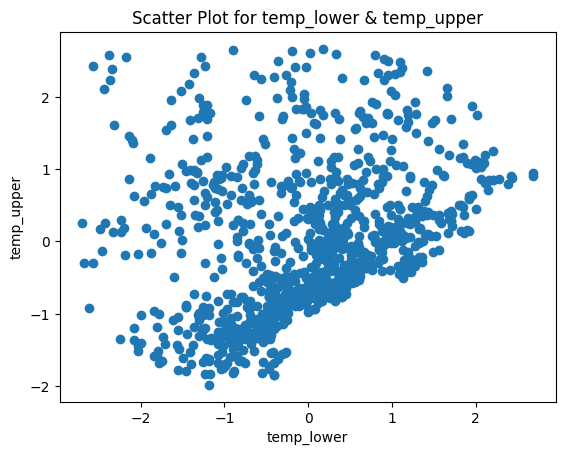

In [222]:
plt.scatter(x_s, y_s)
plt.xlabel('temp_lower')  # Customize x-axis label
plt.ylabel('temp_upper')  # Customize y-axis label
plt.title('Scatter Plot for temp_lower & temp_upper')  # Customize y-axis label
np.mean(x_s), np.std(x_s), np.mean(y_s), np.std(y_s)

## 7. Стандартизуйте этот признак и визуализируйте его в соответствии с индивидуальным заданием. Визуализация доп. признака – эмпирическая функция распределения 


In [223]:
def ECDF(data, x):
    counter = 0
    for v in data:
        if v <= x:
            counter += 1
    return counter / len(data)

In [233]:
samples = y_s # upper temp
npoints = 500
dx = (samples.max()-samples.min())/npoints

xlist = [samples.min()+dx*i for i in range(npoints)]
ylist = [ECDF(samples, x) for x in xlist]

In [234]:
df_ECDF = pd.DataFrame(ylist, columns=['temp_upper'],index=xlist)
df_ECDF

,temp_upper
-1.983587,0.000973
-1.974295,0.000973
-1.965002,0.000973
-1.955710,0.000973
-1.946418,0.000973
...,...
2.616030,0.997082
2.625322,0.997082
2.634614,0.997082
2.643906,0.998054


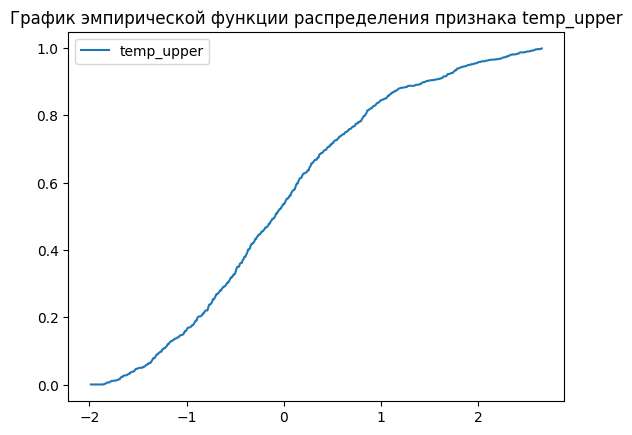

In [235]:
df_ECDF.plot.line(title='График эмпирической функции распределения признака temp_upper');

## 8. Сформируйте набор входных данных из двух стандартизованных признаков набора данных (независимый признак и определенный признак), постройте нейронную сеть (нелинейный регресор) с количеством скрытых слоев, количеством нейронов и функцией активации, указанными в индивидуальном задании, и одним нейроном в выходном слое и обучите ее на наборе данных из двух признаков и отклика. Отследите обучение нейронной сети, изменяя, при необходимости, гиперпараметры (функцию потерь, оптимизатор, шаг обучения и т.п.) или применяя регуляризацию.

## 9. Визуализируйте набор данных в виде диаграммы рассеяния и прогноз нейронной сети в виде поверхности в трехмерном пространстве, подписывая оси и рисунок.
## 10. Разбейте набор данных из двух признаков и отклика на обучающую и тестовую выборки и постройте кривые обучения для заданного показателя качества в зависимости от количества точек в обучающей выборке, подписывая оси и рисунок и создавая легенду.

## Параметры глубокой нейронной сети: кол-во скрытых слоев – 5, кол-во нейронов в скрытом слое – 32, функция активации – гиперболический тангенс. 

In [236]:
x2_out.info

<bound method DataFrame.info of           temp  temp_lower  temp_upper      year
0     0.479555   -0.398768    0.982236 -0.191937
1    -0.771665   -0.234056   -0.821329  0.400526
2    -0.500316   -0.492889   -0.236933 -0.109553
3    -0.666141   -0.269352   -0.660116 -0.390009
4     0.087606    0.248313   -0.095872  0.363716
...        ...         ...         ...       ...
1210  0.464480    0.836568   -0.085797  0.293602
1211 -0.651066   -0.151701   -0.750798  0.404032
1212  0.811203    1.154226    0.085492  0.903593
1213  0.012232    0.224783   -0.176478  0.375986
1214  1.399126    1.060105    0.962085 -0.028922

[1028 rows x 4 columns]>

In [241]:
#Let's study the dependence of temp_upper on temp and temp_lower
X = np.array(x2_out[['temp','temp_lower']])
y = np.array(x2_out[['temp_upper']]).reshape(-1)

In [242]:
X.shape, y.shape

((1028, 2), (1028,))

In [243]:
from mpl_toolkits import mplot3d


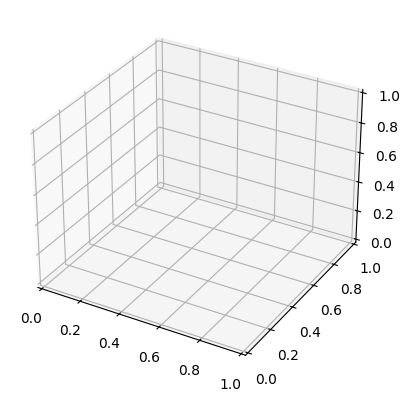

In [244]:
fig = plt.figure()
ax = plt.axes(projection='3d')

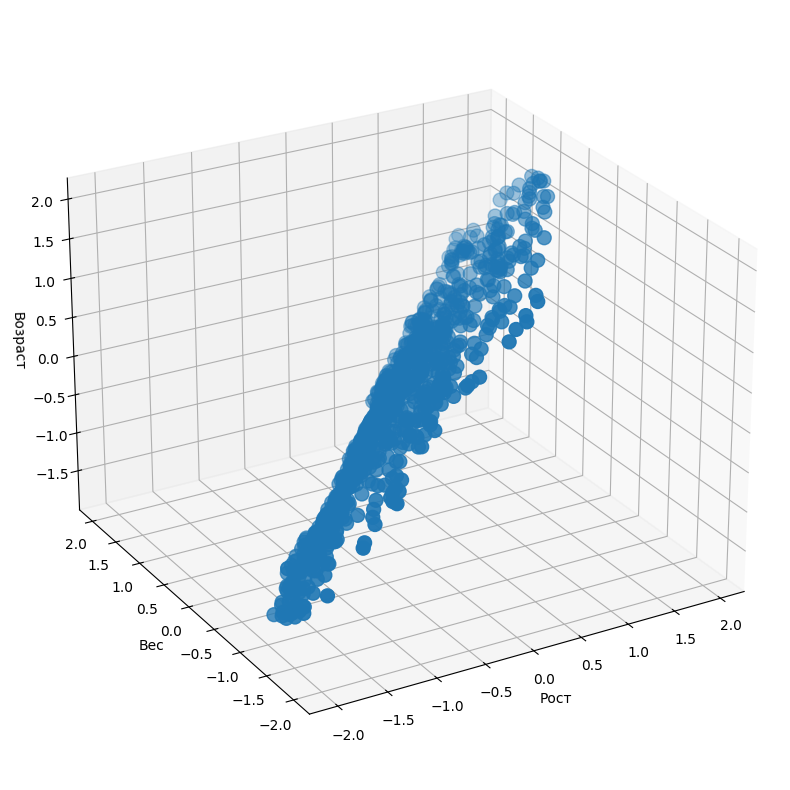

In [245]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

xs = X[:,0]
ys = X[:,1]
zs = y


In [278]:
ax.scatter( xs, ys, zs, s=100 )
ax.set_xlabel('temp')
ax.set_ylabel('temp_lower')
ax.set_zlabel('temp_upper')
ax.view_init( azim=-120, elev=25 )

In [246]:
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(2,))
feature_normalizer.adapt(X)

C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\preprocessing\normalization.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [247]:
#Let's create a neural network with a normalization layer,
#five hidden dense layers with 64 neurons and an activation function ReLu and an output layer of one neuron:
large_model = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(units=32, activation='tanh'),
    tf.keras.layers.Dense(units=32, activation='tanh'),
    tf.keras.layers.Dense(units=32, activation='tanh'),
    tf.keras.layers.Dense(units=32, activation='tanh'),
    tf.keras.layers.Dense(units=32, activation='tanh'),
    tf.keras.layers.Dense(units=1)
])

large_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 2)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,356 (17.02 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 3 (16.00 B)

In [248]:
#Let's compile the model using the root mean square error MSE with the default optimizer (RmsProp) as the loss function:
large_model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

In [249]:
history = large_model.fit(
    X, y,
    epochs=100,
    # уровень выводимой информации
    verbose=1,
    # проверка (валидация) на 30% обучающих данных
    validation_split = 0.3)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2192 - mae: 0.3373 - mse: 0.2192 - val_loss: 0.0308 - val_mae: 0.1354 - val_mse: 0.0308
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0219 - mae: 0.1139 - mse: 0.0219 - val_loss: 0.0107 - val_mae: 0.0755 - val_mse: 0.0107
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0120 - mae: 0.0819 - mse: 0.0120 - val_loss: 0.0075 - val_mae: 0.0646 - val_mse: 0.0075
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0079 - mae: 0.0673 - mse: 0.0079 - val_loss: 0.0062 - val_mae: 0.0604 - val_mse: 0.0062
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0076 - mae: 0.0685 - mse: 0.0076 - val_loss: 0.0050 - val_mae: 0.0464 - val_mse: 0.0050
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0044 - mae: 0.0454 - mse: 0.0044 - val_loss: 0.0047 - val_mae: 0.0549 - val_mse: 0.0047
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0054 - mae: 0.0543 - mse: 0.0054 - val_loss: 

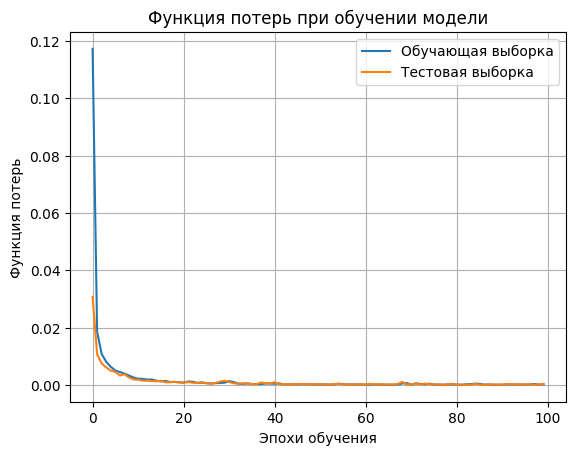

In [250]:
plot_loss(history)

In [251]:
n_plot = 51

x_plot = np.linspace(np.min(xs), np.max(xs), n_plot)
y_plot = np.linspace(np.min(ys), np.max(ys), n_plot)

In [252]:
x_mesh, y_mesh = np.meshgrid(x_plot, y_plot)
x_mesh.shape, y_mesh.shape

((51, 51), (51, 51))

In [253]:
x_plot2 = np.reshape(x_mesh, [n_plot**2,1])
y_plot2 = np.reshape(y_mesh, [n_plot**2,1])
xy_2 = np.hstack([x_plot2, y_plot2])
xy_2.shape

(2601, 2)

In [254]:
z = large_model.predict(xy_2)
z.shape

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step


(2601, 1)

In [255]:
z_mesh = z.reshape((n_plot, n_plot))
z_mesh.shape

(51, 51)

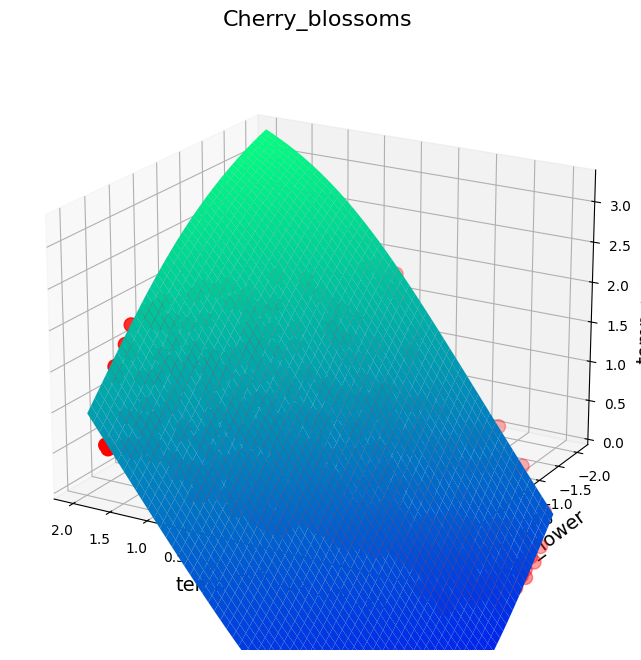

In [258]:
from matplotlib import cm

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x_mesh, y_mesh, z_mesh, \
       rstride=1, cstride=1, linewidth=0.05, cmap=cm.winter, antialiased=True, \
       edgecolors='gray')
ax.scatter( xs, ys, zs, s=100, c='r' )

ax.set_xlabel('temp', fontsize=14)
ax.set_ylabel('temp_lower', fontsize=14)
ax.set_zlabel('temp_upper', fontsize=14)
ax.set_title('Cherry_blossoms', fontsize=16)

ax.set_zlim(0., z_mesh.max())
ax.view_init(elev = 20, azim = 120)

In [259]:
#Learning curves
def train_test_split(X, y, test_ratio=0.2, seed=None):
    """возвращает X_train, X_test, y_train, y_test"""
    assert X.shape[0] == y.shape[0], \
        "Размер X должен быть равен размеру y"
    assert 0.0 <= test_ratio <= 1.0, \
        "Неверное значение test_ratio"

    if seed:
        np.random.seed(seed)

    shuffled_indexes = np.random.permutation(len(X))

    test_size = int(len(X) * test_ratio)
    test_indexes = shuffled_indexes[:test_size]
    train_indexes = shuffled_indexes[test_size:]

    X_train = X[train_indexes]
    y_train = y[train_indexes]

    X_test = X[test_indexes]
    y_test = y[test_indexes]

    return X_train, X_test, y_train, y_test

In [260]:
#Let's split the data arrays `X` and `y` into training and test data:
X_train, X_test, y_train, y_test = train_test_split(X, y, 0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((720, 2), (308, 2), (720,), (308,))

In [274]:
#We will use the MSE indicator for visualization
def my_mse(y_test, y_predict):
    return np.sum((y_predict - y_test)**2) / len(y_test)


In [275]:
# Всего в обучающей выборке 720 точка, начнем с 11 точек и будем прибавлять по 10 точек на каждом шаге цикла:
train_score = []
test_score = []
for i in range(10, 720, 10):
    large_model = tf.keras.Sequential([
        feature_normalizer,
        tf.keras.layers.Dense(units=32, activation='tanh'),
        tf.keras.layers.Dense(units=32, activation='tanh'),
        tf.keras.layers.Dense(units=32, activation='tanh'),
        tf.keras.layers.Dense(units=32, activation='tanh'),
        tf.keras.layers.Dense(units=32, activation='tanh'),
        tf.keras.layers.Dense(units=1)
])
    large_model.compile(loss='mse')
    large_model.fit(X_train[:i], y_train[:i], epochs=50, verbose=0)

    y_train_predict = large_model.predict(X_train[:i])
    train_score.append(my_mse(y_train[:i], y_train_predict))

    y_test_predict = large_model.predict(X_test)
    test_score.append(my_mse(y_test, y_test_predict))
    print('-->', i, ' done')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step
--> 10  done
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step
--> 20  done
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step
--> 30  done
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
--> 40  done
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step
--> 50  done
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
--> 60  done
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
--> 70  done
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step
--> 80  done
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step
--> 90  done
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
--> 100  done
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step


In [276]:
test_score

[396.63643973214283,
 381.7247362012987,
 398.6898843344156,
 410.34448559253246,
 457.62560876623377,
 416.82142857142856,
 466.97955560064935,
 492.44617491883116,
 473.68075284090907,
 389.42291497564935,
 412.93039772727275,
 464.60480925324674,
 488.8656655844156,
 470.41700487012986,
 410.6696174918831,
 477.36414366883116,
 444.23584618506493,
 453.36399147727275,
 443.6841517857143,
 458.11820211038963,
 525.2320921266233,
 490.33203125,
 431.0861911525974,
 480.20393668831167,
 421.45769074675326,
 454.86840503246754,
 445.9845271915584,
 437.0233867694805,
 491.847554788961,
 404.54791497564935,
 430.4549005681818,
 475.35049715909093,
 489.45662540584414,
 481.9957893668831,
 445.9104099025974,
 466.47402597402595,
 503.81808035714283,
 414.2267907873377,
 461.69881290584414,
 426.9865564123377,
 464.44805194805195,
 443.0960328733766,
 425.5003804788961,
 446.97367086038963,
 528.6191152597403,
 477.53865665584414,
 434.97615665584414,
 443.03596793831167,
 467.76171875,
 4

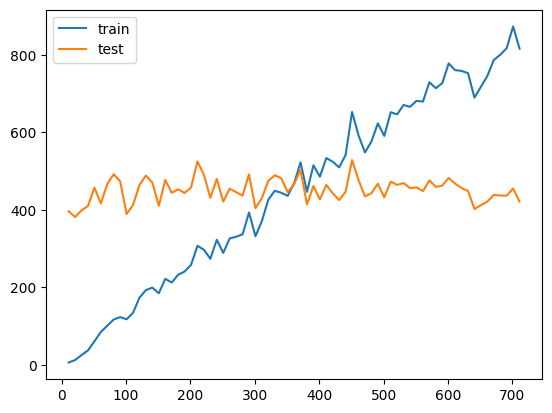

In [277]:
plt.plot([i for i in range(11, len(X_train)+1, 10)],
                               train_score, label="train")
plt.plot([i for i in range(11, len(X_train)+1, 10)],
                               test_score, label="test")
plt.legend();